In [1]:
# This installs the ability to import jupyter notebooks
import sys

!{sys.executable} -m pip install import_ipynb

In [ ]:
import import_ipynb
from util import *

# Read a CSV
calendar = read_csv('../data/calendar.csv')

calendar.head()

In [8]:
print(calendar['listing_id'].isnull().values.any())
print(calendar['date'].isnull().values.any())
print(calendar['available'].isnull().values.any())

False
False
False


Mem. usage decreased to 37.21 Mb (12.5% reduction)
Data collected for 2016-02-01 00:00:00
3818
Data collected for 2016-03-01 00:00:00
3818
Data collected for 2016-04-01 00:00:00
3818
Data collected for 2016-05-01 00:00:00
3818
Data collected for 2016-06-01 00:00:00
3818
Data collected for 2016-07-01 00:00:00
3818
Data collected for 2016-08-01 00:00:00
3818
Data collected for 2016-09-01 00:00:00
3818
Data collected for 2016-10-01 00:00:00
3818
Data collected for 2016-11-01 00:00:00
3818
Data collected for 2016-12-01 00:00:00
3818
Data collected for 2017-01-01 00:00:00
3818


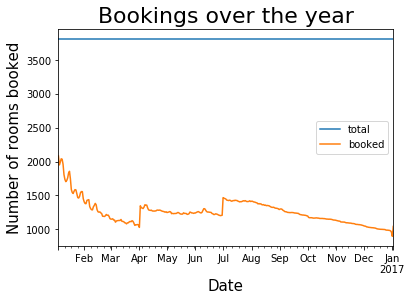

In [5]:
import import_ipynb
from util import *
from datetime import timedelta

"""
Every day from first to last day of data, plot how many properties were listed and how many properties
were booked each day
"""

# This is what we want to populate and plot
listing_data = pd.DataFrame(columns=['date', 'total', 'booked'])

calendar = pd.read_csv('../data/calendar.csv', parse_dates=['date']).pipe(reduce_mem_usage)

# These are the min and max dates in calendar (worked out earlier)
current_date = min(calendar['date'])
end_date = max(calendar['date'])

while current_date <= end_date:

    todays_listings = calendar[calendar['date'] == current_date]

    total = row_count(todays_listings)
    booked = row_count(todays_listings[todays_listings['available'] == 'f'])

    listing_data = listing_data.append({'date': current_date, 'total': total, 'booked': booked}, ignore_index = True)

    if(current_date.day == 1):
        print('Data collected for ' + str(current_date))
        print(total)

    current_date = current_date + timedelta(days=1)

standardize_plot_fonts()

plot = listing_data.plot(x='date')
plot.set_xlabel('Date')
plot.set_ylabel('Number of rooms booked')
plot.set_title('Bookings over the year')

plt.show()

util.ipynb:95: RuntimeWarning: invalid value encountered in less
  "                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n",
util.ipynb:100: RuntimeWarning: invalid value encountered in less
  "                    df[col] = df[col].astype(np.int64)\n",


Mem. usage decreased to  2.07 Mb (22.8% reduction)
Mem. usage decreased to 37.21 Mb (12.5% reduction)
0 listing ids processed
500 listing ids processed
1000 listing ids processed
1500 listing ids processed
2000 listing ids processed
2500 listing ids processed
3000 listing ids processed
3500 listing ids processed


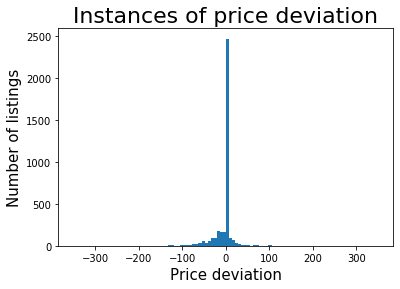

In [2]:
import import_ipynb
from util import *

"""
Plot a histogram of price diffs between calendar.csv and listings.csv
"""

listings = read_csv('../data/listings.csv')

# Remove listings in calendar that don't have price data
calendar = read_csv('../data/calendar.csv')
calendar = calendar.dropna()
unique_listing_ids = calendar['listing_id'].unique()

# Build up the listing id prices in calendar
listing_id_2_price = {}
i = 0
for listing_id in unique_listing_ids:
    listing_for_id = calendar[calendar['listing_id'] == listing_id]
    price = listing_for_id['price'].iloc[0].replace('$', '').replace(',', '')
    listing_id_2_price[listing_id] = price

    if i%500==0:
        print(str(i) + ' listing ids processed')
    i += 1

# Build up a map of listing id price diffs
listing_price_diffs = {}
for listing_id in listing_id_2_price.keys():

    price_in_listings = listings[listings['id'] == listing_id]['price'].iloc[0].replace('$', '').replace(',', '')

    listing_price_diffs[listing_id] = float(listing_id_2_price[listing_id]) - float(price_in_listings)

standardize_plot_fonts()

# Plot a histogram of the diff values
plt.hist(listing_price_diffs.values(), bins=100)
plt.title('Instances of price deviation')
plt.xlabel('Price deviation')
plt.ylabel('Number of listings')

plt.show()

Mem. usage decreased to  2.07 Mb (22.8% reduction)


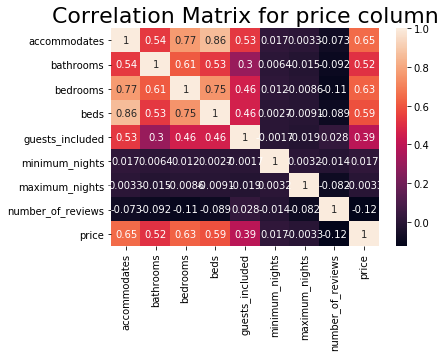

In [6]:
import import_ipynb
from util import *

import seaborn as sns

"""
Plot a correlation matrix that shows how price correlates with other columns
"""

listings = read_csv('../data/listings.csv')

correlation_df = pd.DataFrame()
correlation_df['accommodates'] = listings['accommodates']
correlation_df['bathrooms'] = listings['bathrooms']
correlation_df['bedrooms'] = listings['bedrooms']
correlation_df['beds'] = listings['beds']
correlation_df['guests_included'] = listings['guests_included']
correlation_df['minimum_nights'] = listings['minimum_nights']
correlation_df['maximum_nights'] = listings['maximum_nights']
correlation_df['number_of_reviews'] = listings['number_of_reviews']
correlation_df['price'] = listings['price'].replace('$', '').replace(',', '').apply(lambda x: float(x.replace('$', '').replace(',', '')))


corr_matrix = correlation_df.corr()

standardize_plot_fonts()

sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)

plt.title('Correlation Matrix for price column')

plt.show()

util.ipynb:118: RuntimeWarning: invalid value encountered in less
  "                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n",
util.ipynb:123: RuntimeWarning: invalid value encountered in less
  "                    df[col] = df[col].astype(np.int64)\n",
D:\Users\ravis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1

Mem. usage decreased to  2.07 Mb (22.8% reduction)


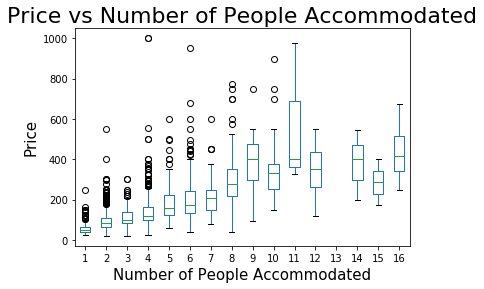

In [2]:
import import_ipynb
from investigations import *

# Show a box plot for Price vs Number of People Accommodated
listings = read_csv('../data/listings.csv')
listings['price'] = listings['price'].apply(parse_price)

plot_box(listings, 'accommodates', 'price', 'Number of People Accommodated', 'Price')

util.ipynb:118: RuntimeWarning: invalid value encountered in less
  "                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n",
util.ipynb:123: RuntimeWarning: invalid value encountered in less
  "                    df[col] = df[col].astype(np.int64)\n",


Mem. usage decreased to  2.07 Mb (22.8% reduction)


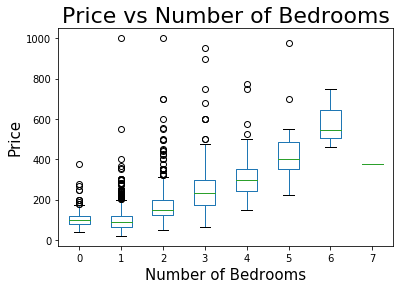

In [3]:
import import_ipynb
from investigations import *

# Show a box plot for Price vs Number of Bedrooms
listings = read_csv('../data/listings.csv')
listings['price'] = listings['price'].apply(parse_price)

plot_box(listings, 'bedrooms', 'price', 'Number of Bedrooms', 'Price')

util.ipynb:118: RuntimeWarning: invalid value encountered in less
  "                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n",
util.ipynb:123: RuntimeWarning: invalid value encountered in less
  "                    df[col] = df[col].astype(np.int64)\n",
D:\Users\ravis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1

Mem. usage decreased to  2.07 Mb (22.8% reduction)


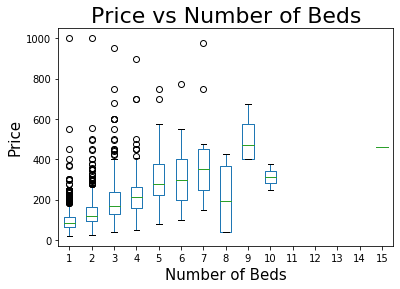

In [4]:
import import_ipynb
from investigations import *

# Show a box plot for Price vs Number of Beds
listings = read_csv('../data/listings.csv')
listings['price'] = listings['price'].apply(parse_price)

plot_box(listings, 'beds', 'price', 'Number of Beds', 'Price')

util.ipynb:118: RuntimeWarning: invalid value encountered in less
  "                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n",
util.ipynb:123: RuntimeWarning: invalid value encountered in less
  "                    df[col] = df[col].astype(np.int64)\n",
D:\Users\ravis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1

Mem. usage decreased to  2.07 Mb (22.8% reduction)


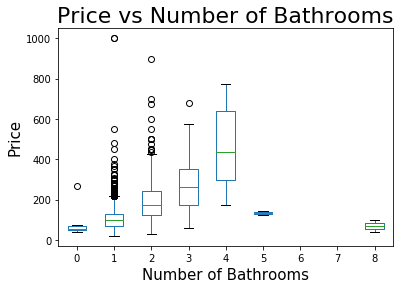

In [5]:
import import_ipynb
from investigations import *

# Show a box plot for Price vs Number of Bathrooms
listings = read_csv('../data/listings.csv')
listings['price'] = listings['price'].apply(parse_price)

plot_box(listings, 'bathrooms', 'price', 'Number of Bathrooms', 'Price')

util.ipynb:118: RuntimeWarning: invalid value encountered in less
  "                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n",
util.ipynb:123: RuntimeWarning: invalid value encountered in less
  "                    df[col] = df[col].astype(np.int64)\n",
D:\Users\ravis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Users\ravis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1

Mem. usage decreased to  2.07 Mb (22.8% reduction)


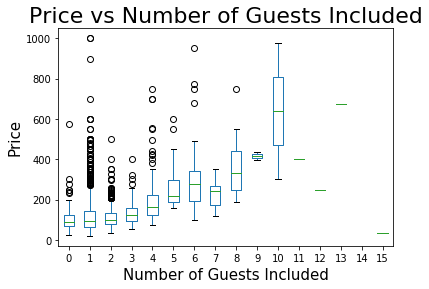

In [6]:
import import_ipynb
from investigations import *

# Show a box plot for Price vs Number of Guests Included
listings = read_csv('../data/listings.csv')
listings['price'] = listings['price'].apply(parse_price)

plot_box(listings, 'guests_included', 'price', 'Number of Guests Included', 'Price')

In [2]:
import import_ipynb
from investigations import *

price_bucket_size = 50

generate_pricing_model_data(price_bucket_size)

Mem. usage decreased to  2.07 Mb (22.8% reduction)
Done generating pricing model data


util.ipynb:130: RuntimeWarning: invalid value encountered in less
  "                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n",
util.ipynb:135: RuntimeWarning: invalid value encountered in less
  "                    df[col] = df[col].astype(np.int64)\n",


Mem. usage decreased to  0.04 Mb (75.0% reduction)
[[512  15  17   0   0   0   0   0   0   0   0   0]
 [223  29  42   0   0   0   0   0   0   0   0   0]
 [ 85  32  90   0   0   0   0   0   0   0   0   0]
 [  4   4  31   0   0   0   0   0   0   0   0   0]
 [  1   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0  21   0   0   0   0   0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   1   4   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0]]


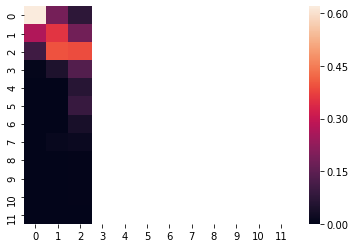

In [11]:
import import_ipynb
from util import *

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix

import seaborn as sns

# Init variables
price_multiple = 1000 / price_bucket_size

# Get training data and turn price into an integer
model_df = read_csv('../data/pricing_model_train.csv')
model_df['price'] = model_df['price'].apply(lambda x: int(x * price_multiple))

# Retrieve x values from training data and transpose the values
X = [
    list(model_df['accommodates']),
    list(model_df['bedrooms']),
    list(model_df['beds']),
    list(model_df['bathrooms']),
    list(model_df['guests_included']),
]
X = np.array(X).T.tolist()

# The y values are the price
Y = list(model_df['price'])

# Create an MLP Classifer
clf = MLPClassifier(solver='sgd', activation='relu', alpha=1e-7, hidden_layer_sizes=(9, 7), random_state=15, max_iter=1000000)

# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fit the model
clf.fit(x_train, y_train)

# Make predictions on test input
y_pred = clf.predict(x_test)

# Build a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Show the matrix
print(matrix)

# Persist the confusion matrix
pd.DataFrame(matrix).to_csv('../data/confusion_matrix.csv',index=False)

# Show a heatmap of the normalized confusion matrix (To visualize correctness as opposed to quantity)
sns.heatmap(pd.DataFrame(matrix).pipe(normalize_confusion_matrix))
plt.show()

Mem. usage decreased to  2.07 Mb (22.8% reduction)
Done generating pricing model data
Mem. usage decreased to  0.04 Mb (75.0% reduction)
[[461  68  15   0   0   0   0   0   0   0   0   0]
 [193  61  40   0   0   0   0   0   0   0   0   0]
 [ 70  57  80   0   0   0   0   0   0   0   0   0]
 [  3   5  31   0   0   0   0   0   0   0   0   0]
 [  1   2  13   0   0   0   0   0   0   0   0   0]
 [  0   2  19   0   0   0   0   0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   2   3   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0]]


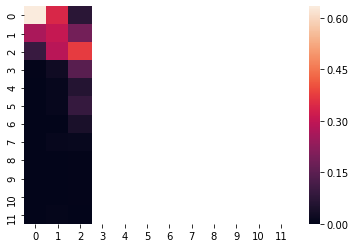

In [3]:
import import_ipynb
from investigations import *

price_bucket_size = 50

generate_pricing_model_data(price_bucket_size)

train_pricing_model_on('accommodates', price_multiple = 1000 / price_bucket_size)

In [10]:
import import_ipynb
from util import *

calendar_seattle = read_csv('../data/calendar.csv')
calendar_boston = read_csv('../data/boston/calendar.csv')
reviews_seattle = read_csv('../data/reviews.csv')
reviews_boston = read_csv('../data/boston/reviews.csv')

print(calendar_seattle.head())
print(calendar_boston.head())
print('--------------------------')
print(reviews_seattle.head())
print(reviews_boston.head())

Mem. usage decreased to 37.21 Mb (12.5% reduction)
Mem. usage decreased to 34.95 Mb (12.5% reduction)
Mem. usage decreased to  2.91 Mb (25.0% reduction)
Mem. usage decreased to  2.34 Mb (25.0% reduction)
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
   listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN
--------------------------
   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850       

In [7]:
import import_ipynb
from util import *

listings_seattle = read_csv('../data/listings.csv')
listings_boston = read_csv('../data/boston/listings.csv')

print(listings_seattle.columns)
print(listings_boston.columns)

Mem. usage decreased to  2.07 Mb (22.8% reduction)
Mem. usage decreased to  2.03 Mb (22.0% reduction)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_

In [11]:
import import_ipynb
from util import *

listings = read_csv('../data/boston/listings.csv')

print('room_type' in listings.columns)
print('accommodates' in listings.columns)
print('bathrooms' in listings.columns)
print('bedrooms' in listings.columns)
print('beds' in listings.columns)
print('price' in listings.columns)

Mem. usage decreased to  2.03 Mb (22.0% reduction)
True
True
True
True
True
True


Mem. usage decreased to  2.07 Mb (22.8% reduction)
Mem. usage decreased to  2.03 Mb (22.0% reduction)
Mem. usage decreased to  0.17 Mb (57.1% reduction)


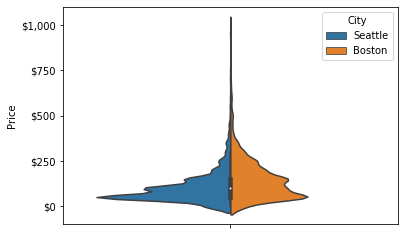

In [2]:
import import_ipynb
from investigations import *

# Join the data from the two cities
join_seattle_boston_apt_data(price_bucket_size=50)

listings = read_csv('../data/listings_joined.csv')
listings = listings.dropna()
listings = listings[listings['Price'] <= 20]
listings[''] = 0 # Create a redundant column to facilitate the creation of a violin plot

# Create a violin plot
plot = sns.violinplot(x='', y='Price', hue='City', split=True, data=listings)
plot.set_xticklabels([''])
plot.set_yticklabels(['', '$0', '$250', '$500', '$750', '$1,000'])

plt.show()

Mem. usage decreased to  0.17 Mb (57.1% reduction)
20


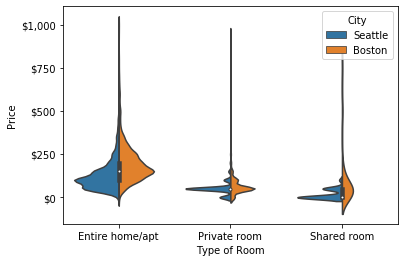

Mem. usage decreased to  0.17 Mb (57.1% reduction)
20


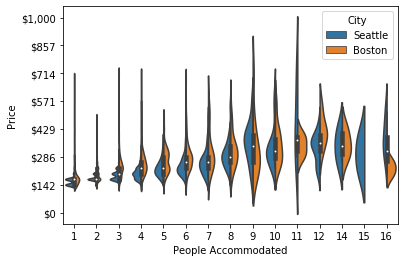

Mem. usage decreased to  0.17 Mb (57.1% reduction)
20


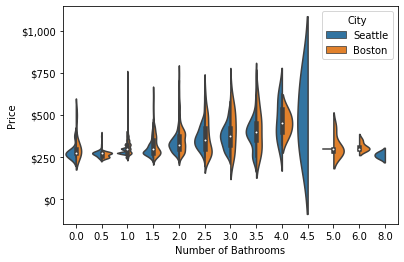

Mem. usage decreased to  0.17 Mb (57.1% reduction)
20


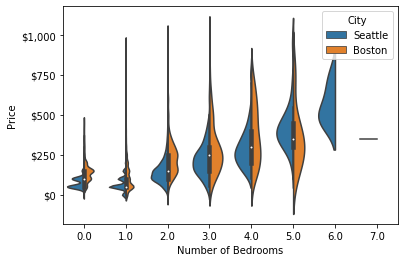

Mem. usage decreased to  0.17 Mb (57.1% reduction)
20


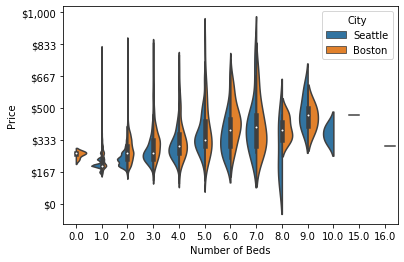

In [3]:
import import_ipynb
from investigations import *

seattle_boston_compare_price_of('Type of Room', ['', '$0', '$250', '$500', '$750', '$1,000'])
seattle_boston_compare_price_of('People Accommodated', ['', '$0', '$142', '$286', '$429', '$571', '$714', '$857', '$1,000'])
seattle_boston_compare_price_of('Number of Bathrooms', ['', '$0', '$250', '$500', '$750', '$1,000'])
seattle_boston_compare_price_of('Number of Bedrooms', ['', '$0', '$250', '$500', '$750', '$1,000'])
seattle_boston_compare_price_of('Number of Beds', ['', '$0', '$167', '$333', '$500', '$667', '$833', '$1,000'])

Mem. usage decreased to  0.17 Mb (57.1% reduction)


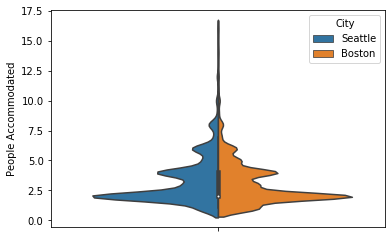

Mem. usage decreased to  0.17 Mb (57.1% reduction)


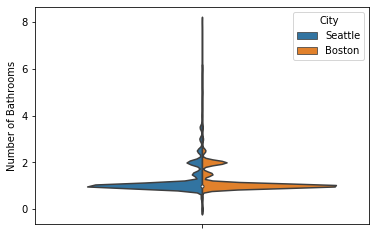

Mem. usage decreased to  0.17 Mb (57.1% reduction)


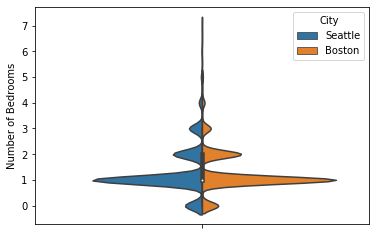

Mem. usage decreased to  0.17 Mb (57.1% reduction)


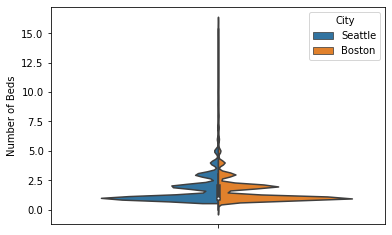

Mem. usage decreased to  0.17 Mb (57.1% reduction)


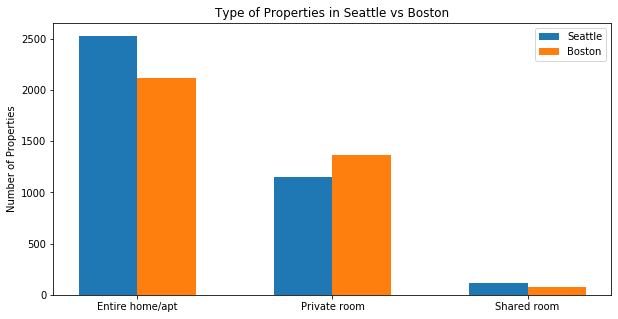

In [3]:
import import_ipynb
from investigations import *

seattle_boston_compare('People Accommodated')
seattle_boston_compare('Number of Bathrooms')
seattle_boston_compare('Number of Bedrooms')
seattle_boston_compare('Number of Beds')

listings = read_csv('../data/listings_joined.csv')
listings = listings.dropna()

# Plot the room types in a bar chart
seattle_num_home = row_count(listings[(listings['Type of Room'] == 'Entire home/apt') & (listings['City'] == 'Seattle')])
seattle_num_room = row_count(listings[(listings['Type of Room'] == 'Private room') & (listings['City'] == 'Seattle')])
seattle_num_shared_room = row_count(listings[(listings['Type of Room'] == 'Shared room') & (listings['City'] == 'Seattle')])

boston_num_home = row_count(listings[(listings['Type of Room'] == 'Entire home/apt') & (listings['City'] == 'Boston')])
boston_num_room = row_count(listings[(listings['Type of Room'] == 'Private room') & (listings['City'] == 'Boston')])
boston_num_shared_room = row_count(listings[(listings['Type of Room'] == 'Shared room') & (listings['City'] == 'Boston')])

# Specify the values of blue bars (height)
blue_bar = (seattle_num_home, seattle_num_room, seattle_num_shared_room)
# Specify the values of orange bars (height)
orange_bar = (boston_num_home, boston_num_room, boston_num_shared_room)

# Position of bars on x-axis
ind = np.arange(3)

# Figure size
plt.figure(figsize=(10, 5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, blue_bar, width, label='Seattle')
plt.bar(ind + width, orange_bar, width, label='Boston')

plt.ylabel('Number of Properties')
plt.title('Type of Properties in Seattle vs Boston')

# X ticks
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Entire home/apt', 'Private room', 'Shared room'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()